In [1]:
# загрузим необходимые пакеты
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Загрузим таблицу в датафрейм

df = pd.read_csv('tinkoff_chashback.csv')

In [3]:
# Посмотрим на поля и проанализируем таблицу

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              50000 non-null  int64  
 1   cb_merch_last_3_month  50000 non-null  float64
 2   cb_bank_last_3_month   50000 non-null  float64
 3   cb_merch_before        50000 non-null  float64
 4   cb_bank_before         50000 non-null  float64
 5   cnt_communication      50000 non-null  int64  
 6   cnt_activation         50000 non-null  int64  
 7   cnt_view               50000 non-null  int64  
 8   Air                    50000 non-null  float64
 9   Beauty shop            50000 non-null  float64
 10  Book store             50000 non-null  float64
 11  Children               50000 non-null  float64
 12  Cinema                 50000 non-null  float64
 13  Clothes                50000 non-null  float64
 14  Electronics            50000 non-null  float64
 15  Fa

In [4]:
df.head()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,498.0,157.0,2621.0,31.0,6232.0,0.0,91.0,5356.0,0.0,119.0
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,2.0
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,527.0,398.0,788.0,0.0,9797.0,0.0,1.0,371.0,0.0,458.0
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,227.0,0.0,0.0,0.0,208.0,0.0,14.0,338.0,0.0,10.0
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,452.0,372.0,0.0,76.0,486.0,0.0,499.0,2198.0,0.0,14.0


In [5]:
# Убедимся,что пользователи уникальные

len(df) == df['client_id'].nunique()

True

In [6]:
df.describe()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,4.450470e+08,302.092180,137.422360,461.998100,298.724980,1.719560,112.001180,333.480180,249.180040,96.616780,...,541.092460,282.980680,309.40572,53.426900,3.257744e+03,42.281880,166.712220,1775.399180,0.0,236.119320
std,2.379750e+08,1033.182617,435.794431,1168.480323,766.625666,1.767466,104.646909,519.431044,1618.867772,494.299083,...,862.922798,639.386206,1484.67560,499.915471,9.545272e+03,530.525278,968.359001,2005.510844,0.0,546.726728
min,1.009660e+05,-31499.000000,-4950.000000,-15965.000000,-4702.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.545353e+08,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,45.000000,0.000000,0.000000,...,68.000000,0.000000,0.00000,0.000000,5.520000e+02,0.000000,15.000000,488.000000,0.0,9.000000
50%,3.950847e+08,0.000000,0.000000,92.000000,31.000000,1.000000,86.000000,193.000000,0.000000,0.000000,...,267.000000,24.000000,8.00000,0.000000,1.614000e+03,0.000000,72.000000,1292.000000,0.0,82.000000
75%,6.469640e+08,191.000000,50.000000,358.000000,210.000000,3.000000,176.000000,435.000000,0.000000,46.250000,...,686.250000,350.250000,146.00000,0.000000,3.695000e+03,10.000000,196.000000,2460.000000,0.0,277.000000
max,9.413153e+08,91968.000000,13731.000000,31796.000000,18656.000000,18.000000,713.000000,13462.000000,178604.000000,50237.000000,...,55280.000000,40453.000000,174890.00000,72445.000000,1.158873e+06,113618.000000,198595.000000,123265.000000,0.0,68766.000000


In [7]:
# Отрицательным кэшбек быть не может, очистим данные от этих значений

df = df[df >= 0].dropna(ignore_index= True)

In [8]:
df.describe()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
count,4.988600e+04,49886.000000,49886.000000,49886.000000,49886.000000,49886.000000,49886.000000,49886.000000,49886.000000,49886.000000,...,49886.000000,49886.000000,49886.000000,49886.000000,4.988600e+04,49886.000000,49886.000000,49886.000000,49886.0,49886.000000
mean,4.451973e+08,303.261917,138.618931,460.371868,297.226095,1.719180,111.950868,333.329331,248.956441,96.494628,...,540.052440,282.881750,308.892034,53.275047,3.251102e+03,42.240769,166.718699,1774.382071,0.0,235.562603
std,2.379949e+08,1023.615805,433.390983,1154.899091,759.441082,1.767225,104.630957,519.611746,1620.019336,494.692119,...,862.027844,639.453906,1484.734887,500.062435,9.528810e+03,531.014701,969.426152,2005.744479,0.0,545.531682
min,1.009660e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.545498e+08,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,45.000000,0.000000,0.000000,...,68.000000,0.000000,0.000000,0.000000,5.500000e+02,0.000000,15.000000,488.000000,0.0,9.000000
50%,3.952796e+08,0.000000,0.000000,91.000000,30.000000,1.000000,86.000000,192.000000,0.000000,0.000000,...,267.000000,24.000000,8.000000,0.000000,1.610000e+03,0.000000,72.000000,1290.000000,0.0,81.000000
75%,6.470650e+08,191.000000,50.000000,356.000000,209.000000,3.000000,176.000000,434.000000,0.000000,46.000000,...,685.000000,350.000000,146.000000,0.000000,3.687000e+03,10.000000,196.000000,2458.750000,0.0,276.000000
max,9.413153e+08,91968.000000,13731.000000,30274.000000,18656.000000,18.000000,713.000000,13462.000000,178604.000000,50237.000000,...,55280.000000,40453.000000,174890.000000,72445.000000,1.158873e+06,113618.000000,198595.000000,123265.000000,0.0,68766.000000


In [9]:
# Вычислим сумму кэшбека за последние три месяца и до этого

df['total_cb_last_3_month'] = df['cb_merch_last_3_month'] + df['cb_bank_last_3_month']
df['total_cb_before'] = df['cb_merch_before'] + df['cb_bank_before']

In [10]:
# Вычислим сумму трат за последние три месяца и до этого

df['total_spending_last_3m'] = df.loc[:, 'Air':'Transport'].sum(axis= 1)
df['total_spending_before'] = df.loc[:, 'Air_before':'Transport_before'].sum(axis= 1)

In [11]:
# Вычислим отношение кэшбека к тратам за последние три месяца и до этого

df['cb_rate_last_3_month'] = (df['total_cb_last_3_month'] / df['total_spending_last_3m']).fillna(0)
df['cb_rate_before'] = (df['total_cb_before'] / df['total_spending_before']).fillna(0)

In [12]:
# Вычислим отношение числа активированных предложений к числу отправленных коммуникаций

df['act_per_com'] = (df['cnt_activation'] / df['cnt_communication']).fillna(0)
df['act_per_com'] = np.where(df['act_per_com'] != np.inf, df['act_per_com'], 0)

In [13]:
df.head()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Supermarkets_before,Taxi_before,Transport_before,total_cb_last_3_month,total_cb_before,total_spending_last_3m,total_spending_before,cb_rate_last_3_month,cb_rate_before,act_per_com
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,5356.0,0.0,119.0,423.0,244.0,12832.0,16800.0,0.032964,0.014524,38.166667
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,12.0,0.0,2.0,0.0,0.0,0.0,14.0,0.000000,0.000000,0.000000
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,371.0,0.0,458.0,0.0,0.0,9775.0,12474.0,0.000000,0.000000,0.000000
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,338.0,0.0,10.0,174.0,253.0,1164.0,904.0,0.149485,0.279867,45.666667
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,2198.0,0.0,14.0,0.0,358.0,7707.0,4489.0,0.000000,0.079751,4.500000


<Axes: xlabel='cnt_communication', ylabel='cb_rate_last_3_month'>

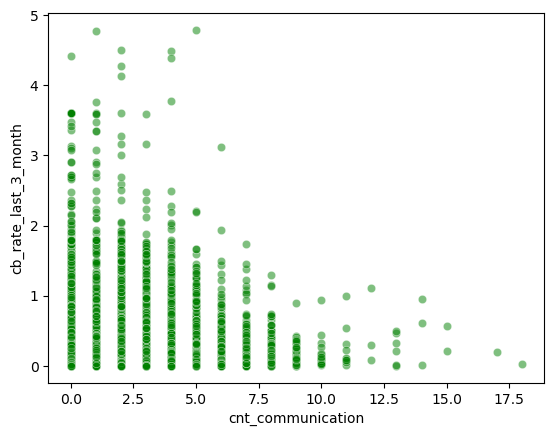

In [22]:
sns.scatterplot(data=df[df['cb_rate_last_3_month'] < 5], x='cnt_communication', y='cb_rate_last_3_month', color='green', alpha=0.5)

In [ ]:
# Наблюдается слабая отрицательная корреляция между количеством коммуникаций и процентом кэшбэка для значений кэшбэка менее 5%
# Большинство клиентов получают мало сообщений. Значительный разброс данных указывает на влияние других факторов.

<Axes: xlabel='cnt_activation', ylabel='total_cb_last_3_month'>

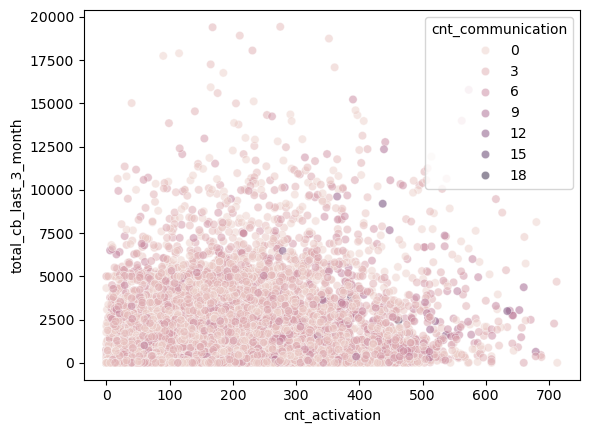

In [35]:
sns.scatterplot(data=df[(df['total_cb_last_3_month'] < 20000)], 
                x='cnt_activation', y='total_cb_last_3_month', color='green', alpha=0.5, hue='cnt_communication')